<a href="https://colab.research.google.com/github/ClaudioDiporty/Introduction-to-Vision-Computational-with-Python-and-OpenCV/blob/main/Introdu%C3%A7%C3%A3o_Vis%C3%A3o_Computacional_Python_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Importando as bibliotecas necessárias.*

In [1]:
import cv2
from cv2 import cvtColor
from matplotlib import pyplot as plt
import numpy as np

# *Mostrando as propriedades de uma imagem:*

# *Abrir, exibir e salvar  uma imagem.*

In [ ]:
#Função usada para abrir a imagem através de cv2.imread() que leva como argumento o nome do arquivo em disco
imagem = cv2.imread('/content/drive/MyDrive/10-SEGMENTAÇÃO DE IMAGENS E RECONHECIMENTO DE PADRÕES/FOTOS/millennium_falcon.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

#Mostrar a imagem com a função plt.imshow da matplotlib
plt.imshow(imagem)
plt.title("Millennium Falcon") #Colocar título na imagem
plt.show()

#Salvar a imagem no disco com função imwrite()
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) #Trocar a cor BGR para RGB
cv2.imwrite("galaxia_original.jpg", imagem)

#Mostrar a imagem em uma janela, espera pressionar qualquer tecla para fechar
cv2.waitKey(0) 

# *Exibir:<br/>Largura, altura e quantidade de canais em pixels*

In [3]:
#Saber largura, altura e quantidade de canais da imagem
print('Largura em pixels: ', end='')
print(imagem.shape[1]) #Largura da imagem
print('Altura em pixels: ', end='')
print(imagem.shape[0]) #Altura da imagem
print('Qtde de canais: ', end='')
print(imagem.shape[2]) #Qtde de canais da imagem    

Largura em pixels: 445
Altura em pixels: 640
Qtde de canais: 3


# *Sistema de coordenadas e manipulação de pixels*


In [ ]:
(b, g, r) = imagem[600, 280] #Veja que a ordem BGR e não RGB
print('O pixel (0, 0) tem as seguintes cores:')
print('Vermelho:', r,'-', 'Verde:', g,'-', 'Azul:', b)

In [ ]:
print('O pixel (167, 298) tem as seguintes cores:')
(b, g, r) = imagem[0, 0] #Veja que a ordem BGR e não RGB
print('Vermelho:', r,'-', 'Verde:', g,'-', 'Azul:', b)

## *Outra possibilidade é utilizar dois laços de repetição para<br/> “Varrer” todos os pixels da imagem.<br/>Lembrando que o custo do Algoritmo é alto,<br/> pois precisa "Varrer" toda imagem.* 

In [ ]:
"""
-Cores mais comuns em RGB
1.   Branco - RGB (255,255,255)
2.   Azul - RGB (0,0,255)
3.   Vermelho - RGB (255,0,0)
4.   Verde - RGB (0,255,0)
5.   Amarelo - RGB (255,255,0)
6.   Magenta - RGB (255,0,255)
7.   Ciano - RGB (0,255,255)
8.   Preto - RGB (0,0,0)

Utilizando sistema de 'varrer'todos os pixels da imagem,
o resultado é uma imagem com todos os pixels substituídos pela cor azul RGB(0,0,255)
"""
img_percorrer = cv2.imread("/content/galaxia_original.jpg")
img_percorrer = cv2.cvtColor(img_percorrer, cv2.COLOR_BGR2RGB)

for y in range(0, img_percorrer.shape[0]):
 for x in range(0, img_percorrer.shape[1]):
   img_percorrer[y, x] = (0,0,255) #Em alguns casos, veja que a ordem BGR e não RGB

plt.imshow(img_percorrer)
plt.title("Imagem modificada, todos pixels azul")
plt.show()
cv2.waitKey(0)

In [ ]:
#Incluíndo as variáveis de linha e coluna para serem componentes de cor
img_var_cor = cv2.imread("/content/galaxia_original.jpg")

for y in range(0, img_var_cor.shape[0]): #Percorre linhas
 for x in range(0, img_var_cor.shape[1]): #Percorre colunas
  img_var_cor[y, x] = (x%256,y%256,x%256) 
  """Lembrando que as variáveis componentes da cor devem assumir o valor entre 0 e 255, 
  então utilizamos a operação “resto da divisão por 256” para manter o resultado entre 0 e 255.
  """
plt.imshow(img_var_cor)
plt.title("Imagem modificada com variáveis como componente de cor")
plt.show()
cv2.waitKey(0)

In [ ]:
"""Veja que utilizamos os valores de linha multiplicado pela coluna (x*y) no componente “R”, 
(lembrando que é BGR e não RGB), da tupla que forma a cor de cada pixel e deixamos o 
componente azul e verde zerados. 
A dinâmica da mudança de linhas e colunas gera esta imagem.
"""
#Verificar se a imagem está em RGB ou BGR
img_valor_X_linha = cv2.imread("/content/galaxia_original.jpg")

for y in range(0, img_valor_X_linha.shape[0], 1): #Percorre as linhas
 for x in range(0, img_valor_X_linha.shape[1], 1): #Percorre as colunas
  img_valor_X_linha[y, x] = ((x*y)%256, 0, 0)

plt.imshow(img_valor_X_linha)
plt.title("Imagem com valores de linhas modificados")
plt.show()
cv2.waitKey(0)

In [ ]:
"""Saltar a cada 10 pixels ao percorrer as linhas e mais 10 pixels ao percorrer as colunas. 
A cada salto é criado um quadrado de 5x5 pixels.
"""
image_quad = cv2.imread("/content/galaxia_original.jpg")
image_quad = cv2.cvtColor(image_quad, cv2.COLOR_BGR2RGB)

for y in range(0, image_quad.shape[0], 10):   #Percorre linhas
  for x in range(0, image_quad.shape[1], 10): #Percorre colunas
    image_quad[y:y+5, x: x+5] = (0,0,0)       #Define a cor

plt.imshow(image_quad)
plt.title("Imagem modificada")
plt.show()
cv2.waitKey(0)

# *Fatiamento e desenho geométricos sobre a imagem*


## *Técnica de Slicing*

In [ ]:
#Para alterar vários pixeis da imagem de uma única vez
imagem_slicing = cv2.imread('galaxia_original.jpg')
imagem_slicing = cv2.cvtColor(imagem_slicing, cv2.COLOR_BGR2RGB)

#Cria um retangulo azul por toda a largura da imagem
imagem_slicing[30:50, :] = (255, 0, 0)

#Cria um quadrado vermelho
imagem_slicing[100:150, 50:100] = (0, 0, 255)

#Cria um retangulo amarelo por toda a altura da imagem
imagem_slicing[:, 200:220] = (0, 255, 255)

#Cria um retangulo verde da linha 150 a 300 nas colunas 250 a 350
imagem_slicing[30:80, 250:270] = (0, 255, 0)

#Cria um quadrado ciano da linha 150 a 300 nas colunas 250 a 350
imagem_slicing[90:220, 150:180] = (255, 255, 0)

#Cria um quadrado branco
imagem_slicing[110:160, 230:260] = (255, 255, 255)

#Cria um quadrado preto
imagem_slicing[30:140, 50:70] = (0, 0, 0)

plt.imshow(imagem_slicing)
plt.title("Resultado de fatiamento de pixel da imagem")
plt.show()
cv2.waitKey(0)

In [ ]:
#Varias figuras geométricas
img_geometricas = cv2.imread('/content/galaxia_original.jpg')
img_geometricas = cv2.cvtColor(img_geometricas, cv2.COLOR_BGR2RGB)

vermelho = (0, 0, 255)
verde = (0, 255, 0)
azul = (255, 0, 0)
magenta = (255, 0, 255) #RGB(255,0,255)
ciano = (255, 255, 0)   #RGB(0,255,255)
amarelo = (0, 255, 255) #RGB(255,255,0)
branco = (255,255,255)
preto = (0,0,0)

cv2.line(img_geometricas, (0, 0), (100, 200), azul, 5)
cv2.line(img_geometricas, (300, 200), (100, 100), amarelo, 10)
cv2.rectangle(img_geometricas, (20, 20), (120, 120), vermelho, 5)
cv2.rectangle(img_geometricas, (200, 50), (225, 125), ciano, -1)

(X, Y) = (img_geometricas.shape[1] // 2, img_geometricas.shape[0] // 2)
for raio in range(0, 160, 15):
  cv2.circle(img_geometricas, (X, Y), raio, branco)

plt.imshow(img_geometricas)
plt.title("Varias Figuras Geométricas")
plt.show()

In [ ]:
#Escrever na Imagem
img_escrita = cv2.imread('/content/galaxia_original.jpg')
img_escrita = cv2.cvtColor(img_escrita, cv2.COLOR_BGR2RGB)

fonte = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_escrita,'Millennium',(90,300), fonte,2,(255,0,0),2,cv2.LINE_AA,)

plt.imshow(img_escrita)
plt.title("Imagem com escrita")
plt.show()

# *Transformações e máscaras*

## *1.1 Cortando uma imagem / Crop*

In [ ]:
#Recorte 
img_crop = cv2.imread('/content/galaxia_original.jpg')
img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB)

recorte = img_crop[10:60, 100:160]
plt.imshow(recorte)
plt.title("Exibe recorte da imagem da linha 10 até a linha 60 e da coluna 101 até a coluna 160:")
plt.show()
cv2.waitKey(0)

## *1.2 Redimensionamento / Resize\*

In [ ]:
"""
Importante: É preciso calcular a proporção da altura em relação a largura
da nova imagem, caso contrário ela poderá ficar distorcida.
"""
img_resize = cv2.imread('/content/galaxia_original.jpg')
img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)

largura = img_resize.shape[1]
altura = img_resize.shape[0]
proporcao = float(altura/largura)

largura_nova = 150 #Em pixels
altura_nova = int(largura_nova*proporcao)
tamanho_novo = (largura_nova, altura_nova)

img_redimensionada = cv2.resize(img_resize,
tamanho_novo, interpolation = cv2.INTER_AREA) 
"""A função ‘rezise’ utiliza uma propriedade definida como 
cv2.INTER_AREA que é uma especificação do cálculo matemático
para redimensionar a imagem.
"""                                          
plt.imshow(img_redimensionada)
plt.title("Imagem Redimensionada")
plt.show()

cv2.waitKey(0)

In [ ]:
"""
Outra meneira de redimensionar imagem é utilizando a técnica de ‘slicing’.
Neste caso, cortar pela metade o tamanho da imagem.
"""
img_resize_slicing = cv2.imread('/content/galaxia_original.jpg')
img_redimensionada_slicing = img_resize_slicing[::2,::2]
img_redimensionada_slicing = cv2.cvtColor(img_redimensionada_slicing, cv2.COLOR_BGR2RGB)

plt.imshow(img_redimensionada_slicing)
plt.title("Técnica Slicing")
plt.show()

print("Largura:", img_redimensionada_slicing.shape[1], "pixels")
print("Altura: ", img_redimensionada_slicing.shape[0], "pixels")

cv2.waitKey(0)

## *1.3 Espelhando uma imagem / Flip*

In [ ]:
#Espelhamento Horinzontal
flip_horizontal = cv2.imread('/content/galaxia_original.jpg')
flip_horizontal = cv2.cvtColor(flip_horizontal, cv2.COLOR_BGR2RGB)

#flip_horizontal = img_flip[::-1,:] #Comando equivalente abaixo
flip_horizontal = cv2.flip(flip_horizontal, 1)

plt.imshow(flip_horizontal)
plt.title("Espelhamento Horinzontal")
plt.show()

cv2.waitKey(0)

In [ ]:
#Espelhamento Vertical
flip_vertical = cv2.imread('/content/galaxia_original.jpg')
flip_vertical = cv2.cvtColor(flip_vertical, cv2.COLOR_BGR2RGB)

#flip_vertical = flip_vertical[:,::-1] #Comando equivalente abaixo
flip_vertical = cv2.flip(flip_vertical, 0)

plt.imshow(flip_vertical)
plt.title("Espelhamento Vertical")
plt.show()
cv2.waitKey(0)

In [ ]:
#h = horinzontal, v = vertical
flip_hv = cv2.imread('/content/galaxia_original.jpg')
flip_hv = cv2.cvtColor(flip_hv, cv2.COLOR_BGR2RGB)

flip_hv = flip_hv[::-1,::-1] #Comando equivalente abaixo
#flip_hv = cv2.flip(img, -1)

plt.imshow(flip_hv)
plt.title("h = horinzontal, v = vertical")
plt.show()

cv2.waitKey(0)

## *1.4 Rotacionando uma imagem / Rotate*

In [ ]:
img_rotate = cv2.imread('/content/galaxia_original.jpg')
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2RGB) #Transforamar BGR em RGB

(alt, lar) = img_rotate.shape[:2] #Captura altura e largura
centro = (lar // 2, alt // 2) #Achar o centro da Imagem
M = cv2.getRotationMatrix2D(centro, 30, 1.0) #30 graus

img_rotacionada = cv2.warpAffine(img_rotate, M, (lar, alt))

plt.imshow(img_rotacionada)
plt.title("Imagem rotacionada em 30 graus")
plt.show()

cv2.waitKey(0)

## *1.5 Máscaras*

In [ ]:
"""
Uma máscara nada mais é que uma imagem onde cada pixel pode estar “ligado” ou “desligado”,
ou seja, a máscara possui pixels pretos e brancos apenas.
Veja o primeiro exemplo:
"""
img_mascara = cv2.imread('/content/galaxia_original.jpg')
img_mascara = cv2.cvtColor(img_mascara, cv2.COLOR_BGR2RGB)

plt.imshow(img_mascara)
plt.title("Imagem Original")
plt.show()

mascara = np.zeros(img_mascara.shape[:2], dtype = "uint8")
(cX, cY) = (img_mascara.shape[1] // 2, img_mascara.shape[0] // 2)
cv2.circle(mascara, (cX, cY), 80, 255, -1)

img_com_mascara = cv2.bitwise_and(img_mascara, img_mascara, mask = mascara)


plt.imshow(img_com_mascara)
plt.title("Imagem com Aplicação da Mascára")
plt.show()

cv2.waitKey(0)

In [ ]:
"""
Segundo exemplo:
"""
img_mascara_02 = cv2.imread('/content/galaxia_original.jpg')
img_mascara_02 = cv2.cvtColor(img_mascara_02, cv2.COLOR_BGR2RGB)

mascara = np.zeros(img_mascara_02.shape[:2], dtype = "uint8")
(cX, cY) = (img_mascara_02.shape[1] // 2, img_mascara_02.shape[0] // 2)
cv2.circle(mascara, (cX, cY), 180, 255, 70)
cv2.circle(mascara, (cX, cY), 70, 255, -1)

img_com_mascara_02 = cv2.bitwise_and(img_mascara_02, img_mascara_02, mask = mascara)

plt.imshow(img_com_mascara_02)
plt.title("Imagem com Aplicação da Mascára")
plt.show()

# *Sistemas de cores*



In [23]:
"""
Além dos espaços de cores RGB(que OpenCv lê em BGR), existe outros
espaços de cores como:
-"Preto e Branco"
-"Tons de Cinza"
-"L*a*b*"
-"HSV"
"""
img_original_juntos = cv2.imread("/content/galaxia_original.jpg")
cv2.imwrite("original_juntos.jpg", img_original_juntos)

True

In [ ]:
img_juntos = cv2.imread("/content/original_juntos.jpg")
img_juntos = cv2.cvtColor(img_juntos, cv2.COLOR_BGR2RGB)

plt.imshow(img_juntos)
plt.title("Millennium Falcon")
plt.show()

gray = cv2.cvtColor(img_juntos, cv2.COLOR_BGR2GRAY) #tons de cinza
plt.imshow(gray)
plt.title("Gray")
plt.show()

hsv = cv2.cvtColor(img_juntos, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.title("HSV")
plt.show()

lab = cv2.cvtColor(img_juntos, cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.title("L*a*b*")
plt.show()

cv2.waitKey(0)

In [ ]:
"""
Formato RGB possui 3 canais, canais, um para cada cor. 
Existem funções do OpenCV que permitem separar e visualizar esses canais individualmente.
"""
individual = cv2.imread('/content/galaxia_original.jpg')
#individual = cv2.cvtColor(individual, cv2.COLOR_BGR2RGB)

#função ‘split’ faz separar os canais. Assim podemos exibí-los separadamente
(canalAzul, canalVerde, canalVermelho) = cv2.split(individual)

plt.imshow(canalVermelho)
plt.title("vermelho")
plt.show()

plt.imshow(canalVerde)
plt.title("verde")
plt.show()

plt.imshow(canalAzul)
plt.title("azul")
plt.show()

cv2.waitKey(0)

In [ ]:
"""
É possível exibir os canais nas cores originais
Cores mais comuns em RGB
1.   Branco - RGB (255,255,255)
2.   Azul - RGB (0,0,255)
3.   Vermelho - RGB (255,0,0)
4.   Verde - RGB (0,255,0)
5.   Amarelo - RGB (255,255,0)
6.   Magenta - RGB (255,0,255)
7.   Ciano - RGB (0,255,255)
8.   Preto - RGB (0,0,0)
"""
indiv_original = cv2.imread('/content/galaxia_original.jpg')
indiv_original = cv2.cvtColor(indiv_original, cv2.COLOR_BGR2RGB)

#usando a função cv2.split
(canalAzul, canalVerde, canalVermelho) = cv2.split(indiv_original)

#criando matriz de 'zeros'
zeros = np.zeros(indiv_original.shape[:2], dtype = "uint8")

#usando a função cv2.merge  
plt.imshow(cv2.merge([canalVermelho, zeros, zeros]))
plt.title("canal vermelho")
plt.show()

plt.imshow(cv2.merge([zeros,canalVerde, zeros]))
plt.title("canal verde")
plt.show()

plt.imshow(cv2.merge([zeros, zeros,canalAzul]))
plt.title("canal azul")
plt.show()

cv2.waitKey(0)

# *Histogramas e equalização de imagem*


## *Histogramas em imagens com tons de cinza*

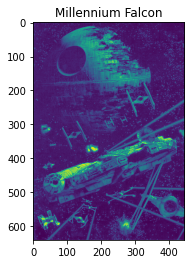

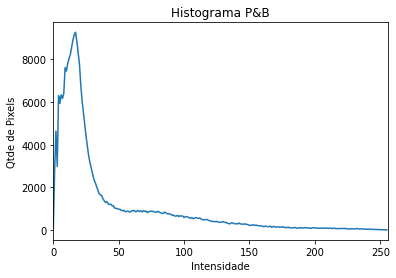

-1

In [55]:
"""
Um histograma é um gráfico de colunas ou de linhas que representa a distribuição dos
valores dos pixels de uma imagem, ou seja, a quantidade de pixeis mais claros (próximos de
255) e a quantidade de pixels mais escuros (próximos de 0).
O eixo X do gráfico normalmente possui uma distribuição de 0 a 255 que demonstra o
valor (intensidade) do pixel e no eixo Y é plotada a quantidade de pixels daquela intensidade.
"""
img_Millennium_gray= cv2.imread('/content/drive/MyDrive/10-SEGMENTAÇÃO DE IMAGENS E RECONHECIMENTO DE PADRÕES/FOTOS/millennium_falcon.jpg')

img_Millennium_gray = cv2.cvtColor(img_Millennium_gray, cv2.COLOR_BGR2GRAY) #converte P&B // Imagem original convertidada para tons de cinza.
plt.imshow(img_Millennium_gray)
plt.title("Millennium Falcon")
plt.show()

cv2.imwrite("Millennium Falcon Cinza.jpg", img_Millennium_gray) 

#Função calcHist para calcular o histograma da imagem
h = cv2.calcHist([img_Millennium_gray], [0], None, [256], [0, 256])
plt.figure()
print() 
plt.title("Histograma P&B")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

## *Histogramas com imagens coloridas*

In [ ]:
img_Millennium_color = cv2.imread('/content/galaxia_original.jpg')
plt.imshow(img_Millennium_color)
plt.title("Millennium Falcon")
plt.show()

#cv2.imwrite("Millennium Falcon Colorida.jpg", img_Millennium_color)

#Separa os canais
canais = cv2.split(img_Millennium_color)
cores = ("b", "g", "r")
print()
plt.figure()
plt.title("'Histograma Colorido")
plt.xlabel("Intensidade")
plt.ylabel("Número de Pixels")

"""Importante notar que a função ‘zip’ cria uma lista de tuplas formada pelas união
das listas passadas e não tem nada a ver com um processo de compactação como poderia se
esperar.
"""
for (canal, cor) in zip(canais, cores):
  #Este loop executa 3 vezes, uma para cada canal
  hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
  plt.plot(hist, cor)
  plt.xlim([0, 256])
plt.show()